In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import odeint

In [2]:
fontsize= 12
ticksize = 14
figsize = (5, 4.5)
params = {'font.family':'serif',
    "figure.figsize":figsize,
    'figure.dpi': 80,
    'figure.edgecolor': 'k',
    'font.size': fontsize,
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'xtick.labelsize': ticksize,
    'ytick.labelsize': ticksize
}
plt.rcParams.update(params)

### Parameters

In [3]:
α = 1.0/3.0
ρ = 0.1111
δ = 0.1
b_1 = 3.0
b_2 = 2.5
A = 0.5

k_bar = (b_2/(b_1-1))**(1/α)

#### Functions and steady states

In [4]:
def f(k):
    index = (k<k_bar)
    return A*index*(k**α) + A*(1-index)*(b_1*(k**α)-b_2)

In [5]:
def f_prime(k):
    index = (k<k_bar)
    return index*A*α*(k**(α-1)) + (1-index)*A*b_1*α*(k**(α-1))

In [6]:
exponent_ss = 1 / (α - 1)

k_ss_low = ((δ + ρ) / (A * α)) ** exponent_ss
k_ss_high = ((δ + ρ) / (A * α * b_1)) ** exponent_ss

c_ss_low = f(k_ss_low) - δ * k_ss_low
c_ss_high = f(k_ss_high) - δ * k_ss_high

kss_tvc = (δ)**(1/(α-1))
css_tvc = 0

#### Defining the grids

In [7]:
c_grid,k_grid = np.meshgrid(np.linspace(0,1,20),np.linspace(0.1,4,20))

dcdt = c_grid*(f_prime(k_grid)-(δ+ρ))
dkdt = f(k_grid)-δ*k_grid-c_grid

magnitude = np.sqrt(dcdt**2 + dkdt**2)


dcdt_normalized = dcdt/magnitude
dkdt_normalized = dkdt/magnitude


#### Finding solutions

In [9]:
def dg_dt(kc, t):
    return f(kc[0])-δ*kc[0] - kc[1], kc[1]*(f_prime(kc[0])- (δ+ρ)) #first one is \dot{k} and the second one is \dot{c}

In [91]:
k_0_low = 1.5 # cpital below the low steady state
k_0_high = 2.5 # cpital below the high steady state


In [184]:
ts = np.linspace(0, 30, 100)
kc0_low = [k_0_low,0.611539]  # the initial condition for c_0 was found by shooting
kc0_high  = [k_0_high, 0.42728] # the initial condition for c_0 was found by shooting

kc0_violate  = [k_0_high-0.2, 0.55] # the initial condition for c_0 was found by shooting

ts1 = np.linspace(0, 22, 200)

sol_below = odeint(dg_dt, kc0_low, ts) # solving the ode for below the low steady state
sol_high = odeint(dg_dt, kc0_high, ts) # solving the ode for below the high steady state
sol_violate = odeint(dg_dt, kc0_violate, ts1) # solving the ode for below the high steady state



c_path_low = sol_below[:,1]
k_path_low = sol_below[:,0]

c_path_high = sol_high[:,1]
k_path_high = sol_high[:,0]

c_path_violate = sol_violate[:,1]
k_path_violate = sol_violate[:,0]


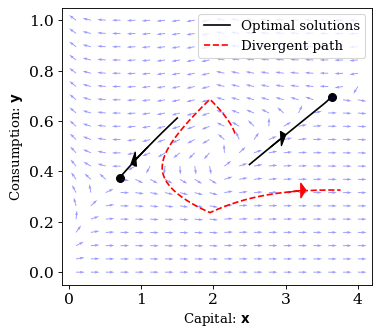

In [190]:
plt.scatter(k_ss_low,c_ss_low,color = 'k', s = 50)
plt.scatter(k_ss_high,c_ss_high,color = 'k', s = 50)
plt.quiver(k_grid,c_grid,dkdt_normalized,dcdt_normalized, color ='blue', alpha = 0.4)
plt.plot(k_path_low,c_path_low,color = 'k', label = 'Optimal solutions')
plt.arrow(x=k_path_low[10], y=c_path_low[10], dx=k_path_low[10]-k_path_low[5], dy=c_path_low[10]-c_path_low[5], head_width=0.06, head_length=0.07, fc='k', ec='k')
plt.arrow(x=k_path_high[10], y=c_path_high[10], dx=k_path_high[10]-k_path_high[5], dy=c_path_high[10]-c_path_high[5], head_width=0.06, head_length=0.07, fc='k', ec='k')
plt.plot(k_path_violate,c_path_violate, color = 'r', linestyle='--', label = 'Divergent path')
plt.arrow(x=k_path_violate[180], y=c_path_violate[180], dx=k_path_violate[180]-k_path_violate[175], dy=c_path_violate[180]-c_path_violate[175], head_width=0.06, head_length=0.07, fc='r', ec='r')

plt.plot(k_path_high,c_path_high,color = 'k')
plt.ylabel(r"Consumption: $\mathbf{y}$")
plt.xlabel(r"Capital: $\mathbf{x}$")
plt.legend()
#plt.savefig('vec_field_con_con.pdf')
